<a href="https://colab.research.google.com/github/abhisheksharma26/ML-practice/blob/master/augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt

import tensorflow as tf

import numpy as np 

import cv2

import PIL

import os


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='G:\deep learning\data augmentation', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it



228818944/228813984 [==============================] - 2s 0us/step


In [6]:
data_dir


'/tmp/.keras/datasets/flower_photos'

In [7]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/tmp/.keras/datasets/flower_photos')

In [8]:
list(data_dir.glob('*/*.jpg'))[:10]


[PosixPath('/tmp/.keras/datasets/flower_photos/roses/123128873_546b8b7355_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/3560426426_1c66cb8330.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/16552686350_db8db55cd2.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/3109712111_75cea2dee6.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/4231745228_ece86330d9.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/17702388233_f29dc14834_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/13231224664_4af5293a37.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/3997609936_8db20b7141_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/9298314004_c1a8146521.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/5628552852_60bbe8d9b0_n.jpg')]

In [9]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


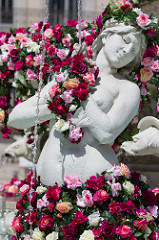

In [10]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

PIL.Image.open(str(roses[5]))


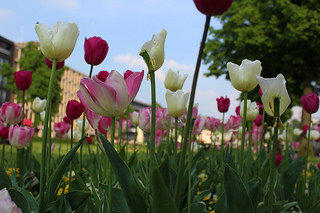

In [11]:

tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[50]))

In [12]:

flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}




In [13]:

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [14]:
flowers_images_dict['roses'][:5]


[PosixPath('/tmp/.keras/datasets/flower_photos/roses/123128873_546b8b7355_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/3560426426_1c66cb8330.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/16552686350_db8db55cd2.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/3109712111_75cea2dee6.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/4231745228_ece86330d9.jpg')]

In [15]:
str(flowers_images_dict['roses'][0])


'/tmp/.keras/datasets/flower_photos/roses/123128873_546b8b7355_n.jpg'

In [16]:



img = cv2.imread(str(flowers_images_dict['roses'][0]))


In [17]:
img.shape


(240, 320, 3)

In [18]:
cv2.resize(img,(180,180)).shape


(180, 180, 3)

In [19]:


X,y = [] , []

for flower_name , images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [23]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 17s 13ms/step - loss: 1.8999 - accuracy: 0.2972
Epoch 2/30
86/86 [==============================] - 1s 13ms/step - loss: 1.0323 - accuracy: 0.6096
Epoch 3/30
86/86 [==============================] - 1s 13ms/step - loss: 0.8908 - accuracy: 0.6744
Epoch 4/30
86/86 [==============================] - 1s 13ms/step - loss: 0.6879 - accuracy: 0.7470
Epoch 5/30
86/86 [==============================] - 1s 12ms/step - loss: 0.5007 - accuracy: 0.8296
Epoch 6/30
86/86 [==============================] - 1s 13ms/step - loss: 0.2802 - accuracy: 0.9075
Epoch 7/30
86/86 [==============================] - 1s 13ms/step - loss: 0.1491 - accuracy: 0.9614
Epoch 8/30
86/86 [==============================] - 1s 13ms/step - loss: 0.0941 - accuracy: 0.9727
Epoch 9/30
86/86 [==============================] - 1s 13ms/step - loss: 0.0481 - accuracy: 0.9915
Epoch 10/30
86/86 [==============================] - 1s 13ms/step - loss: 0.0318 - accuracy: 0.9934
Epoch 11

In [24]:
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 0s 9ms/step - loss: 2.3364 - accuracy: 0.6580


[2.336351156234741, 0.657952070236206]

In [25]:
predictions = model.predict(X_test_scaled)
predictions

array([[ -3.7988665,  14.544319 ,   9.463217 , -20.512691 ,  -2.659029 ],
       [  7.4180236,   5.9780936,  -0.9048096, -15.843533 ,  -1.2829713],
       [ -2.7705514,  -5.111497 ,  11.586657 ,  -1.1189624,  -5.0955706],
       ...,
       [ -3.7915297, -13.394969 ,   1.2414881,   9.879591 ,   1.924996 ],
       [  9.833001 ,  -0.9694567,  -9.931914 ,  -6.52576  ,   5.359785 ],
       [ -7.770571 , -21.92371  ,   4.720736 ,  16.556784 ,  -2.1008813]],
      dtype=float32)

In [26]:
score = tf.nn.softmax(predictions[0])

In [27]:
np.argmax(score)


1

In [28]:
y_test[0]


1

In [33]:

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

NameError: ignored